In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Normal n of features, observations and LATEX TABLE


In [3]:
datasets = ['monk1_enc.csv', 'car_evaluation_enc.csv',
                'balance-scale_enc.csv', 'kr-vs-kp_enc.csv',
                'breast-cancer_enc.csv', 'soybean-small_enc.csv']
dataset_names = {'monk1_enc.csv': 'monk-1',
                 'car_evaluation_enc.csv': 'car-evaluation',
                'balance-scale_enc.csv': 'balance-scale',
                'kr-vs-kp_enc.csv': 'kr-vs-kp',
                'breast-cancer_enc.csv': 'breast-cancer', 
                'soybean-small_enc.csv': 'soybean-small'}


# os.chdir(r"c:\\Users\\bartd\\Documents\\Erasmus_\\Jaar 4\\Master Econometrie\\Thesis\\Optimal Trees\\StrongTree\\Datasets")
# data_path = os.getcwd() + '\\DataSets\\'
data_path = "c:\\Users\\bartd\\Documents\\Erasmus_\\Jaar 4\\Master Econometrie\\Thesis\\Optimal Trees\\StrongTree\\Datasets\\"
dataset_size = pd.DataFrame({'name': [],
                            'observations': [],
                             'enc_features': [],
                             'features': []}
                            )
cols = ['Name', 'Observations', 'enc_features', 'features']
data_list = []
for dataset in datasets:
    data_enc = pd.read_csv(data_path + dataset)

    name_non_enc = dataset.split('_enc')[0]
    if name_non_enc in ['monk1', 'monk2', 'monk3', 'car_evaluation']:
        data = pd.read_csv(data_path+name_non_enc+'.csv', sep=';')
    else:
        # TODO Preferably do this without a double try block
        try:
            data = pd.read_csv(data_path + name_non_enc+'.data')
        except:
            try:
                data = pd.read_csv(data_path+name_non_enc+'.csv')
            except:
                data = pd.read_csv(data_path+name_non_enc+'.train') 

    list_row = [dataset, data_enc.shape[0],
                data_enc.shape[1], data.shape[1]]
    data_list.append(list_row)


### CREATE DF AND PRINT

In [4]:
#CREATE DF for FEATURES
data_features = pd.DataFrame(data=data_list, columns=cols)
data_features.set_index('Name', inplace = True)
data_features.sort_values(by = "Observations", inplace=True,  ascending = False)
data_features = data_features.reindex(columns = ["Observations", 'features', 'enc_features'])
# data_features.rename(index = dataset_names, inplace=True)
print(data_features)



                        Observations  features  enc_features
Name                                                        
kr-vs-kp_enc.csv                3196        37            39
car_evaluation_enc.csv          1728         7            20
balance-scale_enc.csv            625         5            21
breast-cancer_enc.csv            277        10            39
monk1_enc.csv                    124         7            16
soybean-small_enc.csv             47        36            46


In [138]:
#LATEX PRINT DataFrame for Features
print(data_features.rename(index = dataset_names).to_latex(bold_rows = True, caption = 'Number of observations and features of the datasets used') )

\begin{table}
\centering
\caption{Number of observations and features of the datasets used}
\begin{tabular}{lrrr}
\toprule
{} &  Observations &  features &  enc\_features \\
\textbf{Name          } &               &           &               \\
\midrule
\textbf{kr-vs-kp      } &          3196 &        37 &            39 \\
\textbf{car-evaluation} &          1728 &         7 &            20 \\
\textbf{balance-scale } &           625 &         5 &            21 \\
\textbf{breast-cancer } &           277 &        10 &            39 \\
\textbf{monk-1        } &           124 &         7 &            16 \\
\textbf{soybean-small } &            47 &        36 &            46 \\
\bottomrule
\end{tabular}
\end{table}



# EXPERIMENTS

## LOAD DATASET AND SPLIT Synthetic AND REAL

In [5]:
output_df = pd.read_csv(r"C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\test.csv")
boolean_real = ["synthetic" not in dataset_name for dataset_name in output_df.dataset] #False if index is for synthetic dataset, True otherwise
output_df_real = output_df[boolean_real]
output_df_synthetic = output_df[~np.array(boolean_real)]
output_df_real
output_df_synthetic

,approach,dataset,nrow,depth,warmstart,lambda,time_limit,status,obj_value,train_acc,gap,node_count,solving_time,cb_time_int,cb_time_int_suc,cb_counter_int,cb_counter_int_suc,test_acc,calib_acc,sample
0,BendersOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,-0.0,1.000000,0.000000,42.0,0.322687,0.142335,0.134709,19.0,17.0,1.0000,1.000000,1
1,Cart,synthetic100_10_2.csv,75,2,NaN,0.0,600,NaN,NaN,0.960000,NaN,NaN,0.003033,NaN,NaN,NaN,NaN,1.0000,0.960000,1
2,FlowOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,-0.0,1.000000,0.000000,77.0,0.533596,0.000000,0.000000,0.0,0.0,1.0000,1.000000,1
3,binOCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,0.0,1.000000,0.000000,1.0,0.385108,0.000000,0.000000,0.0,0.0,1.0000,1.000000,1
4,OCT,synthetic100_10_2.csv,75,2,1.0,0.0,600,2.0,300.0,1.000000,0.000000,54.0,0.990624,0.000000,0.000000,0.0,0.0,1.0000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,BendersOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,-inf,NaN,inf,403.0,600.218005,110.638950,110.638950,30.0,30.0,NaN,NaN,4
1240,Cart,synthetic2500_100_5.csv,1875,5,NaN,0.0,600,NaN,NaN,0.857067,NaN,NaN,0.028921,NaN,NaN,NaN,NaN,0.8336,0.888530,4
1241,FlowOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,-268.0,0.857067,9195.149254,1.0,711.805300,0.000000,0.000000,0.0,0.0,0.8336,0.888530,4
1242,binOCT,synthetic2500_100_5.csv,1875,5,1.0,0.0,600,9.0,266.0,0.858133,100.000000,431.0,1038.835313,0.000000,0.000000,0.0,0.0,0.8304,0.890145,4


## Create Group Means

In [6]:
group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
            'train_acc', 'test_acc', 'solving_time', 'gap'].agg([np.mean, np.std])
group_means.loc['BendersOCT', [('test_acc', 'mean'), ('train_acc', 'mean')]]

C:\Users\bartd\AppData\Local\Temp/ipykernel_2224/184403349.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[


test_acc train_acc
                                   mean      mean
dataset                 depth                    
balance-scale_enc.csv   2      0.681529  0.681624
                        3      0.722930  0.741453
                        4      0.732484  0.764423
                        5      0.746815  0.804487
breast-cancer_enc.csv   2      0.707143  0.787440
                        3      0.678571  0.821256
                        4      0.678571  0.852657
                        5      0.696429  0.876812
car_evaluation_enc.csv  2      0.766204  0.781636
                        3      0.792824  0.809799
                        4      0.809028  0.834684
                        5      0.855903  0.869792
kr-vs-kp_enc.csv        2      0.851690  0.847518
                        3      0.903317  0.904568
                        4      0.936170  0.942428
                        5      0.936170  0.942428
monk1_enc.csv           2      0.701613  0.838710
                        3      0.846774  0.932796
                        4      1.000000  1.000000
                        5      1.000000  1.000000
soybean-small_enc.csv   2      1.000000  1.000000
                        3      1.000000  1.000000
                        4      0.979167  1.000000
                        5      0.979167  1.000000
synthetic100_100_2.csv  2      1.000000  1.000000
synthetic100_100_3.csv  3      0.760000  0.933333
synthetic100_100_4.csv  4      0.730000  0.986667
synthetic100_100_5.csv  5      0.500000  0.996667
synthetic100_10_2.csv   2      1.000000  1.000000
synthetic100_10_3.csv   3      1.000000  1.000000
synthetic100_10_4.csv   4      0.910000  0.990000
synthetic100_10_5.csv   5      0.850000  1.000000
synthetic100_30_2.csv   2      1.000000  1.000000
synthetic100_30_3.csv   3      1.000000  1.000000
synthetic100_30_4.csv   4      0.730000  0.980000
synthetic100_30_5.csv   5      0.670000  0.990000
synthetic2500_100_2.csv 2      0.954400  0.947467
synthetic2500_100_3.csv 3      0.808400  0.810533
synthetic2500_100_4.csv 4      0.690800  0.704800
synthetic2500_100_5.csv 5      0.662400  0.663289
synthetic2500_10_2.csv  2      1.000000  1.000000
synthetic2500_10_3.csv  3      1.000000  1.000000
synthetic2500_10_4.csv  4      0.852400  0.866533
synthetic2500_10_5.csv  5      0.937600  0.934533
synthetic2500_30_2.csv  2      1.000000  1.000000
synthetic2500_30_3.csv  3      0.898400  0.901600
synthetic2500_30_4.csv  4      0.840000  0.848933
synthetic2500_30_5.csv  5      0.870800  0.891200
synthetic500_100_2.csv  2      1.000000  1.000000
synthetic500_100_3.csv  3      0.792000  0.826667
synthetic500_100_4.csv  4      0.768000  0.844667
synthetic500_100_5.csv  5      0.661714  0.727238
synthetic500_10_2.csv   2      1.000000  1.000000
synthetic500_10_3.csv   3      0.998000  1.000000
synthetic500_10_4.csv   4      0.988000  0.994000
synthetic500_10_5.csv   5      0.878000  0.942000
synthetic500_30_2.csv   2      1.000000  1.000000
synthetic500_30_3.csv   3      1.000000  1.000000
synthetic500_30_4.csv   4      0.900000  0.905333
synthetic500_30_5.csv   5      0.662000  0.766667

## Analyze Class

In [7]:
class AnalyzeTime():
    def __init__(self, filename) -> None:
        data_path = "c:\\Users\\bartd\\Documents\\Erasmus_\\Jaar 4\\Master Econometrie\\Thesis\\Optimal Trees\\StrongTree\\Results\\"
        self.location = data_path + filename

    def load_dataset(self):
        output_df = pd.read_csv(self.location)
        return output_df

    def split_synthetic_and_real(self, output_df):
        boolean_real = ["synthetic" not in dataset_name for dataset_name in output_df.dataset] #False if index is for synthetic dataset, True otherwise
        output_df_real = output_df[boolean_real]
        output_df_synthetic = output_df[~np.array(boolean_real)]
        return output_df_real, output_df_synthetic

    def create_results(self, output_df):
        # Create a groupby object with the means of train_acc, solving time and mipgap
        group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
            'train_acc', 'test_acc', 'solving_time', 'gap'].agg([np.mean, np.std])

        # Create a groupby object with nrow
        # TODO Add N-features
        group_rows = output_df.groupby(['approach', 'dataset', 'depth'])[
            'nrow'].agg([np.mean])

        # Combine Group Objects
        self.df_results = pd.concat([group_rows, group_means], axis=1)
        return self.df_results

    def add_baseline(self, output_df, df_results):
        # Add baseline Accuracy of CART
        group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
            'train_acc', 'test_acc', 'solving_time', 'gap'].agg([np.mean, np.std])
        baseline_acc = group_means.loc['Cart', [('train_acc', 'mean'), ('test_acc', 'mean')]]
        df_results = pd.merge(df_results.reset_index(), baseline_acc, left_on=[
            'dataset', 'depth'], right_index=True).groupby(['approach', 'dataset', 'depth']).sum()

        df_results.columns = ['obs_count', 'mean_train_acc', 'std_train_acc', 'mean_test_acc', 'std_test_acc', 
                              'mean_solv_time', 'std_solve_time', 'mean_gap',
                              'std_gap', 'mean_train_cart', 'mean_test_cart']
        self.df_results = df_results
        return self.df_results

    def add_n_features(self, data_features):
        n_features = data_features.loc[:, 'enc_features']
        self.df_results = pd.merge(self.df_results.reset_index(), n_features, left_on=['dataset'], right_on=['Name'], 
         right_index=True).groupby(['approach', 'dataset', 'depth']).sum()
        return self.df_results
        

    def n_solved(self, output_df):
        output_df.status.fillna(np.inf, inplace=True)

        # If want to sort at a specific status...
        # status_df = output_df[output_df.loc[:, 'status'] == 2, :].groupby(['approach', 'dataset', 'depth'])[
        #     'status'].agg(['value_counts'])

        status_df = output_df.groupby(['approach', 'dataset', 'depth'])[
            'status'].agg(['value_counts'])
        return status_df



In [20]:
df_results = analyze.create_results(output_df_real)
group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
            'train_acc', 'test_acc', 'solving_time', 'gap'].agg([np.mean, np.std])
baseline_acc = group_means.loc['Cart', [('train_acc', 'mean'), ('test_acc', 'mean')]]
baseline_acc
# df_results = pd.merge(df_results.reset_index(), baseline_acc, left_on=[
            # 'dataset', 'depth'], right_index=True).groupby(['approach', 'dataset', 'depth']).sum()
baseline_acc_cartCV = df_results.loc[idx['CartCV',:], [('train_acc', 'mean'), ('test_acc', 'mean')]]
pd.merge(df_results.reset_index(), baseline_acc_cartCV, left_on=['dataset'], right_on=['dataset'])
pd.merge(df_results.reset_index(), test.reset_index(), left_on=['dataset'], right_on=['dataset'])
df_results.reset_index().join(test.reset_index(), on=['dataset'])
df_results.reset_index()
# test.reset_index()

C:\Users\bartd\AppData\Local\Temp/ipykernel_2224/1924234507.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
C:\Users\bartd\AppData\Local\Temp/ipykernel_2224/1844842700.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[


NameError: name 'test' is not defined

In [29]:
df_results.loc[idx['CartCV',:]]
output_df_real.loc[output_df_real.approach=='CartCV']


,approach,dataset,nrow,depth,warmstart,lambda,time_limit,status,obj_value,train_acc,gap,node_count,solving_time,cb_time_int,cb_time_int_suc,cb_counter_int,cb_counter_int_suc,test_acc,calib_acc,sample
465,CartCV,monk1_enc.csv,93,5,NaN,0.0,600,NaN,NaN,0.881720,NaN,NaN,0.000997,NaN,NaN,NaN,NaN,0.709677,0.935484,4
546,CartCV,car_evaluation_enc.csv,1296,9,NaN,0.0,600,NaN,NaN,0.892747,NaN,NaN,0.002992,NaN,NaN,NaN,NaN,0.865741,0.908879,4
627,CartCV,balance-scale_enc.csv,468,10,NaN,0.0,600,NaN,NaN,0.871795,NaN,NaN,0.002992,NaN,NaN,NaN,NaN,0.783439,0.838710,4
708,CartCV,kr-vs-kp_enc.csv,2397,13,NaN,0.0,600,NaN,NaN,1.000000,NaN,NaN,0.004988,NaN,NaN,NaN,NaN,0.994994,1.000000,4
789,CartCV,breast-cancer_enc.csv,207,7,NaN,0.0,600,NaN,NaN,0.821256,NaN,NaN,0.001995,NaN,NaN,NaN,NaN,0.657143,0.782609,4
870,CartCV,soybean-small_enc.csv,35,3,NaN,0.0,600,NaN,NaN,1.000000,NaN,NaN,0.001995,NaN,NaN,NaN,NaN,1.000000,1.000000,4


In [22]:
df_results.loc[idx['CartCV',:], [('train_acc', 'mean'), ('train_acc', 'std')]]

(train_acc, mean)  (train_acc, std)
approach dataset                depth                                     
CartCV   balance-scale_enc.csv  10              0.871795               NaN
         breast-cancer_enc.csv  7               0.821256               NaN
         car_evaluation_enc.csv 9               0.892747               NaN
         kr-vs-kp_enc.csv       13              1.000000               NaN
         monk1_enc.csv          5               0.881720               NaN
         soybean-small_enc.csv  3               1.000000               NaN

In [17]:
analyze = AnalyzeTime('test.csv')
df_results = analyze.create_results(output_df_real)
df_results = analyze.add_baseline(output_df_real, df_results)

df_results.loc[idx['CartCV',:],:]

C:\Users\bartd\AppData\Local\Temp/ipykernel_2224/1924234507.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
C:\Users\bartd\AppData\Local\Temp/ipykernel_2224/1924234507.py:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
C:\Users\bartd\AppData\Local\Temp/ipykernel_2224/1924234507.py:35: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  df_results = pd.merge(df_results.reset_index(), baseline_acc, left_on=[


obs_count  mean_train_acc  \
approach dataset               depth                              
CartCV   monk1_enc.csv         5           93.0         0.88172   
         soybean-small_enc.csv 3           35.0         1.00000   

                                      std_train_acc  mean_test_acc  \
approach dataset               depth                                 
CartCV   monk1_enc.csv         5                0.0       0.709677   
         soybean-small_enc.csv 3                0.0       1.000000   

                                      std_test_acc  mean_solv_time  \
approach dataset               depth                                 
CartCV   monk1_enc.csv         5               0.0        0.000997   
         soybean-small_enc.csv 3               0.0        0.001995   

                                      std_solve_time  mean_gap  std_gap  \
approach dataset               depth                                      
CartCV   monk1_enc.csv         5                 0.0       0.0      0.0   
         soybean-small_enc.csv 3                 0.0       0.0      0.0   

                                      mean_train_cart  mean_test_cart  
approach dataset               depth                                   
CartCV   monk1_enc.csv         5             0.887097        0.766129  
         soybean-small_enc.csv 3             1.000000        1.000000

In [14]:
analyze = AnalyzeTime('test.csv')
output_df = analyze.load_dataset() 
output_df_real, output_df_synthetic = analyze.split_synthetic_and_real(output_df)

#Create DF With Features 
df_results = analyze.create_results(output_df_real)
df_results = analyze.add_baseline(output_df_real, df_results)
df_results = analyze.add_n_features(data_features) #Add n of features

status_df = analyze.n_solved(output_df) #How many instances are solved

df_results
# df_results.loc[idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT']],:].to_csv(
#     r'C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\aresults_df_time_experiment_real.csv')

C:\Users\bartd\AppData\Local\Temp/ipykernel_2224/1924234507.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
C:\Users\bartd\AppData\Local\Temp/ipykernel_2224/1924234507.py:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_means = output_df.groupby(['approach', 'dataset', 'depth'])[
C:\Users\bartd\AppData\Local\Temp/ipykernel_2224/1924234507.py:35: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  df_results = pd.merge(df_results.reset_index(), baseline_acc, left_on=[


obs_count  mean_train_acc  \
approach   dataset               depth                              
BendersOCT balance-scale_enc.csv 2          468.0        0.681624   
                                 3          468.0        0.741453   
                                 4          468.0        0.764423   
                                 5          468.0        0.804487   
           breast-cancer_enc.csv 2          207.0        0.787440   
...                                           ...             ...   
binOCT     monk1_enc.csv         5           93.0        1.000000   
           soybean-small_enc.csv 2           35.0        1.000000   
                                 3           35.0        1.000000   
                                 4           35.0        1.000000   
                                 5           35.0        1.000000   

                                        std_train_acc  mean_test_acc  \
approach   dataset               depth                                 
BendersOCT balance-scale_enc.csv 2           0.009714       0.681529   
                                 3           0.009714       0.722930   
                                 4           0.005884       0.732484   
                                 5           0.017835       0.746815   
           breast-cancer_enc.csv 2           0.011833       0.707143   
...                                               ...            ...   
binOCT     monk1_enc.csv         5           0.000000       1.000000   
           soybean-small_enc.csv 2           0.000000       1.000000   
                                 3           0.000000       0.937500   
                                 4           0.000000       1.000000   
                                 5           0.000000       1.000000   

                                        std_test_acc  mean_solv_time  \
approach   dataset               depth                                 
BendersOCT balance-scale_enc.csv 2          0.028956        4.714157   
                                 3          0.024669      600.018900   
                                 4          0.020142      600.023131   
                                 5          0.033854      600.044773   
           breast-cancer_enc.csv 2          0.034007       10.221588   
...                                              ...             ...   
binOCT     monk1_enc.csv         5          0.000000        3.599003   
           soybean-small_enc.csv 2          0.000000        0.411508   
                                 3          0.125000        0.607438   
                                 4          0.000000        1.168468   
                                 5          0.000000        2.633835   

                                        std_solve_time    mean_gap   std_gap  \
approach   dataset               depth                                         
BendersOCT balance-scale_enc.csv 2            0.749641    0.000000  0.000000   
                                 3            0.001490    6.076372  2.193045   
                                 4            0.002932   54.719583  4.976175   
                                 5            0.004605  100.000000  0.000000   
           breast-cancer_enc.csv 2            2.009042    0.000000  0.000000   
...                                                ...         ...       ...   
binOCT     monk1_enc.csv         5            0.636140    0.000000  0.000000   
           soybean-small_enc.csv 2            0.178154    0.000000  0.000000   
                                 3            0.057919    0.000000  0.000000   
                                 4            0.026566    0.000000  0.000000   
                                 5            0.074757    0.000000  0.000000   

                                        mean_train_cart  mean_test_cart  \
approach   dataset               depth                                    
BendersOCT balance-scale_enc.csv 2             0.680021        0.686306   
  

In [16]:
idx = pd.IndexSlice
df_results.loc[idx['CartCV'],:]

,,obs_count,mean_train_acc,std_train_acc,mean_test_acc,std_test_acc,mean_solv_time,std_solve_time,mean_gap,std_gap,mean_train_cart,mean_test_cart,enc_features
dataset,depth,,,,,,,,,,,,
monk1_enc.csv,5,93.0,0.88172,0.0,0.709677,0.0,0.000997,0.0,0.0,0.0,0.887097,0.766129,16
soybean-small_enc.csv,3,35.0,1.00000,0.0,1.000000,0.0,0.001995,0.0,0.0,0.0,1.000000,1.000000,46


In [484]:
idx=pd.IndexSlice
df_results.loc[idx['CartCV', :],:]
# output_df_real

obs_count  mean_train_acc  \
approach dataset               depth                              
CartCV   monk1_enc.csv         5           93.0         0.88172   
         soybean-small_enc.csv 3           35.0         1.00000   

                                      std_train_acc  mean_test_acc  \
approach dataset               depth                                 
CartCV   monk1_enc.csv         5                0.0       0.709677   
         soybean-small_enc.csv 3                0.0       1.000000   

                                      std_test_acc  mean_solv_time  \
approach dataset               depth                                 
CartCV   monk1_enc.csv         5               0.0        0.000997   
         soybean-small_enc.csv 3               0.0        0.001995   

                                      std_solve_time  mean_gap  std_gap  \
approach dataset               depth                                      
CartCV   monk1_enc.csv         5                 0.0       0.0      0.0   
         soybean-small_enc.csv 3                 0.0       0.0      0.0   

                                      mean_train_cart  mean_test_cart  \
approach dataset               depth                                    
CartCV   monk1_enc.csv         5             0.887097        0.766129   
         soybean-small_enc.csv 3             1.000000        1.000000   

                                      enc_features  
approach dataset               depth                
CartCV   monk1_enc.csv         5                16  
         soybean-small_enc.csv 3                46

### Results DF to Latex Table

In [485]:
df_real_pivot = output_df_real.pivot_table(columns = 'approach', index = ['dataset', 'depth'], values = ['train_acc', 'test_acc'], aggfunc = ['mean', 'std'])
df_real_pivot = df_real_pivot.swaplevel(0,2, axis = 1)
df_real_pivot

approach                     BendersOCT      Cart    CartCV   FlowOCT  \
                               test_acc  test_acc  test_acc  test_acc   
                                   mean      mean      mean      mean   
dataset                depth                                            
balance-scale_enc.csv  2       0.681529  0.686306       NaN  0.681529   
                       3       0.722930  0.697452       NaN  0.710191   
                       4       0.732484  0.697452       NaN  0.743631   
                       5       0.746815  0.729299       NaN  0.753185   
                       10           NaN       NaN  0.783439       NaN   
breast-cancer_enc.csv  2       0.707143  0.742857       NaN  0.707143   
                       3       0.678571  0.707143       NaN  0.675000   
                       4       0.678571  0.717857       NaN  0.710714   
                       5       0.696429  0.725000       NaN  0.714286   
                       7            NaN       NaN  0.657143       NaN   
car_evaluation_enc.csv 2       0.766204  0.766204       NaN  0.766204   
                       3       0.792824  0.796296       NaN  0.792824   
                       4       0.809028  0.796296       NaN  0.806713   
                       5       0.855903  0.859375       NaN  0.859375   
                       9            NaN       NaN  0.865741       NaN   
kr-vs-kp_enc.csv       2       0.851690  0.764393       NaN  0.836671   
                       3       0.903317  0.903317       NaN  0.903317   
                       4       0.936170  0.936170       NaN  0.936170   
                       5       0.936170  0.936170       NaN  0.936170   
                       13           NaN       NaN  0.994994       NaN   
monk1_enc.csv          2       0.701613  0.661290       NaN  0.701613   
                       3       0.846774  0.782258       NaN  0.870968   
                       4       1.000000  0.782258       NaN  1.000000   
                       5       1.000000  0.766129  0.709677  1.000000   
soybean-small_enc.csv  2       1.000000  0.645833       NaN  1.000000   
                       3       1.000000  1.000000  1.000000  0.937500   
                       4       0.979167  1.000000       NaN  0.958333   
                       5       0.979167  1.000000       NaN  0.895833   

approach                           OCT    binOCT BendersOCT      Cart  \
                              test_acc  test_acc  train_acc train_acc   
                                  mean      mean       mean      mean   
dataset                depth                                            
balance-scale_enc.csv  2      0.681529  0.681529   0.681624  0.680021   
                       3      0.721338  0.718153   0.741453  0.701389   
                       4      0.721338  0.743631   0.764423  0.723291   
                       5      0.714968  0.746815   0.804487  0.791667   
                       10          NaN       NaN        NaN       NaN   
breast-cancer_enc.csv  2      0.707143  0.707143   0.787440  0.776570   
                       3      0.696429  0.703571   0.821256  0.793478   
                       4      0.692857  0.721429   0.852657  0.820048   
                       5      0.714286  0.696429   0.876812  0.853865   
                       7           NaN       NaN        NaN       NaN   
car_evaluation_enc.csv 2      0.766204  0.766204   0.781636  0.781636   
                       3      0.762153  0.789352   0.809799  0.808642   
                       4      0.805556  0.811921   0.834684  0.822531   
                       5      0.712191  0.856481   0.869792  0.868248   
                       9           NaN       NaN        NaN       NaN   
kr-vs-kp_enc.csv       2      0.774718  0.867021   0.847518  0.774301   
                       3      0.617856  0.903317   0.904568  0.904568   
                       4      0.555277  0.936170   0.942428  0.942428   
                       5      0.767209  0.936796   0.9424

In [465]:
idx = pd.IndexSlice
index_row = df_real_pivot.index

max_values_dict = {}
for row in index_row:
    max_value_list=[]
    max_value = df_real_pivot.loc[row, idx[:, 'train_acc', 'mean']].max()
    for approach in ['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT']:
        
        if df_real_pivot.loc[row, idx[approach, 'train_acc', 'mean']] == max_value:
            max_value_list.append(approach)
        max_values_dict[row] = max_value_list


In [463]:
# df_real_pivot.groupby(df_real_pivot.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('±'.join, 1))
df_real_pivot = round(df_real_pivot, 2)

df_sliced = df_real_pivot.loc[:, idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT'], 'train_acc', : ]]
# df_sliced = df_real_pivot.loc[idx[:,[2,3,4,5]], idx[['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT'], 'train_acc', : ]]
df_sliced = df_sliced.groupby(level = [0,1], axis = 1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1))
df_sliced = df_sliced.rename(dataset_names)
df_sliced = df_sliced.reset_index().droplevel(1, axis = 1)

In [464]:
slice_ = ['BendersOCT', 'Cart', 'FlowOCT', 'OCT', 'binOCT']
sliced_table = df_sliced.style.highlight_max(axis = 1,props = 'textbf:--rwrap;', subset = slice_)
sliced_table.hide_index()
sliced_table_latex = sliced_table.to_latex(column_format = 'rrrrrrr', position = 'ht!', position_float ='centering', hrules = True, 
                    multirow_align="t", multicol_align="r", caption = 'Number of observations and features of the datasets used')
# print((df_sliced.style.highlight_max(axis = 1,props = 'textbf:--rwrap;')).to_latex(caption = 'Number of observations and features of the datasets used') )
print(sliced_table_latex)

\begin{table}[ht!]
\centering
\caption{Number of observations and features of the datasets used}
\begin{tabular}{rrrrrrr}
\toprule
{dataset} & {depth} & {BendersOCT} & {Cart} & {FlowOCT} & {OCT} & {binOCT} \\
\midrule
balance-scale & 2 & \textbf{0.68$\pm$0.01} & \textbf{0.68$\pm$0.01} & \textbf{0.68$\pm$0.01} & \textbf{0.68$\pm$0.01} & \textbf{0.68$\pm$0.01} \\
balance-scale & 3 & \textbf{0.74$\pm$0.01} & 0.7$\pm$0.02 & \textbf{0.74$\pm$0.01} & 0.73$\pm$0.01 & 0.73$\pm$0.01 \\
balance-scale & 4 & 0.76$\pm$0.01 & 0.72$\pm$0.03 & 0.75$\pm$0.02 & 0.76$\pm$0.01 & \textbf{0.77$\pm$0.01} \\
balance-scale & 5 & \textbf{0.8$\pm$0.02} & 0.79$\pm$0.01 & 0.76$\pm$0.02 & 0.74$\pm$0.02 & 0.8$\pm$0.01 \\
balance-scale & 10 & \textbf{nan$\pm$nan} & \textbf{nan$\pm$nan} & \textbf{nan$\pm$nan} & \textbf{nan$\pm$nan} & \textbf{nan$\pm$nan} \\
breast-cancer & 2 & \textbf{0.79$\pm$0.01} & 0.78$\pm$0.01 & \textbf{0.79$\pm$0.01} & \textbf{0.79$\pm$0.01} & \textbf{0.79$\pm$0.01} \\
breast-cancer & 3 & \textb

## Useless method to change CART data

In [118]:
exp = pd.read_csv(r"C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\aexperiment_time.csv")
cart_data = pd.read_csv(r"C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\test.csv")

exp.drop(exp.index[exp.approach== 'Cart'],inplace=True)


In [119]:
pd.concat([exp, cart_data], axis = 0).to_csv(r"C:\Users\bartd\Documents\Erasmus_\Jaar 4\Master Econometrie\Thesis\Optimal Trees\StrongTree\Results\aexperiment_time2.csv", index = False)

# Plotting Tries (R is way Betteer)

In [122]:
df_results.loc['BendersOCT', 'mean_gap'].loc['balance-scale_enc.csv'].plot(title=str(level))



KeyError: 'BendersOCT'

balance-scale_enc.csv [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
breast-cancer_enc.csv [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


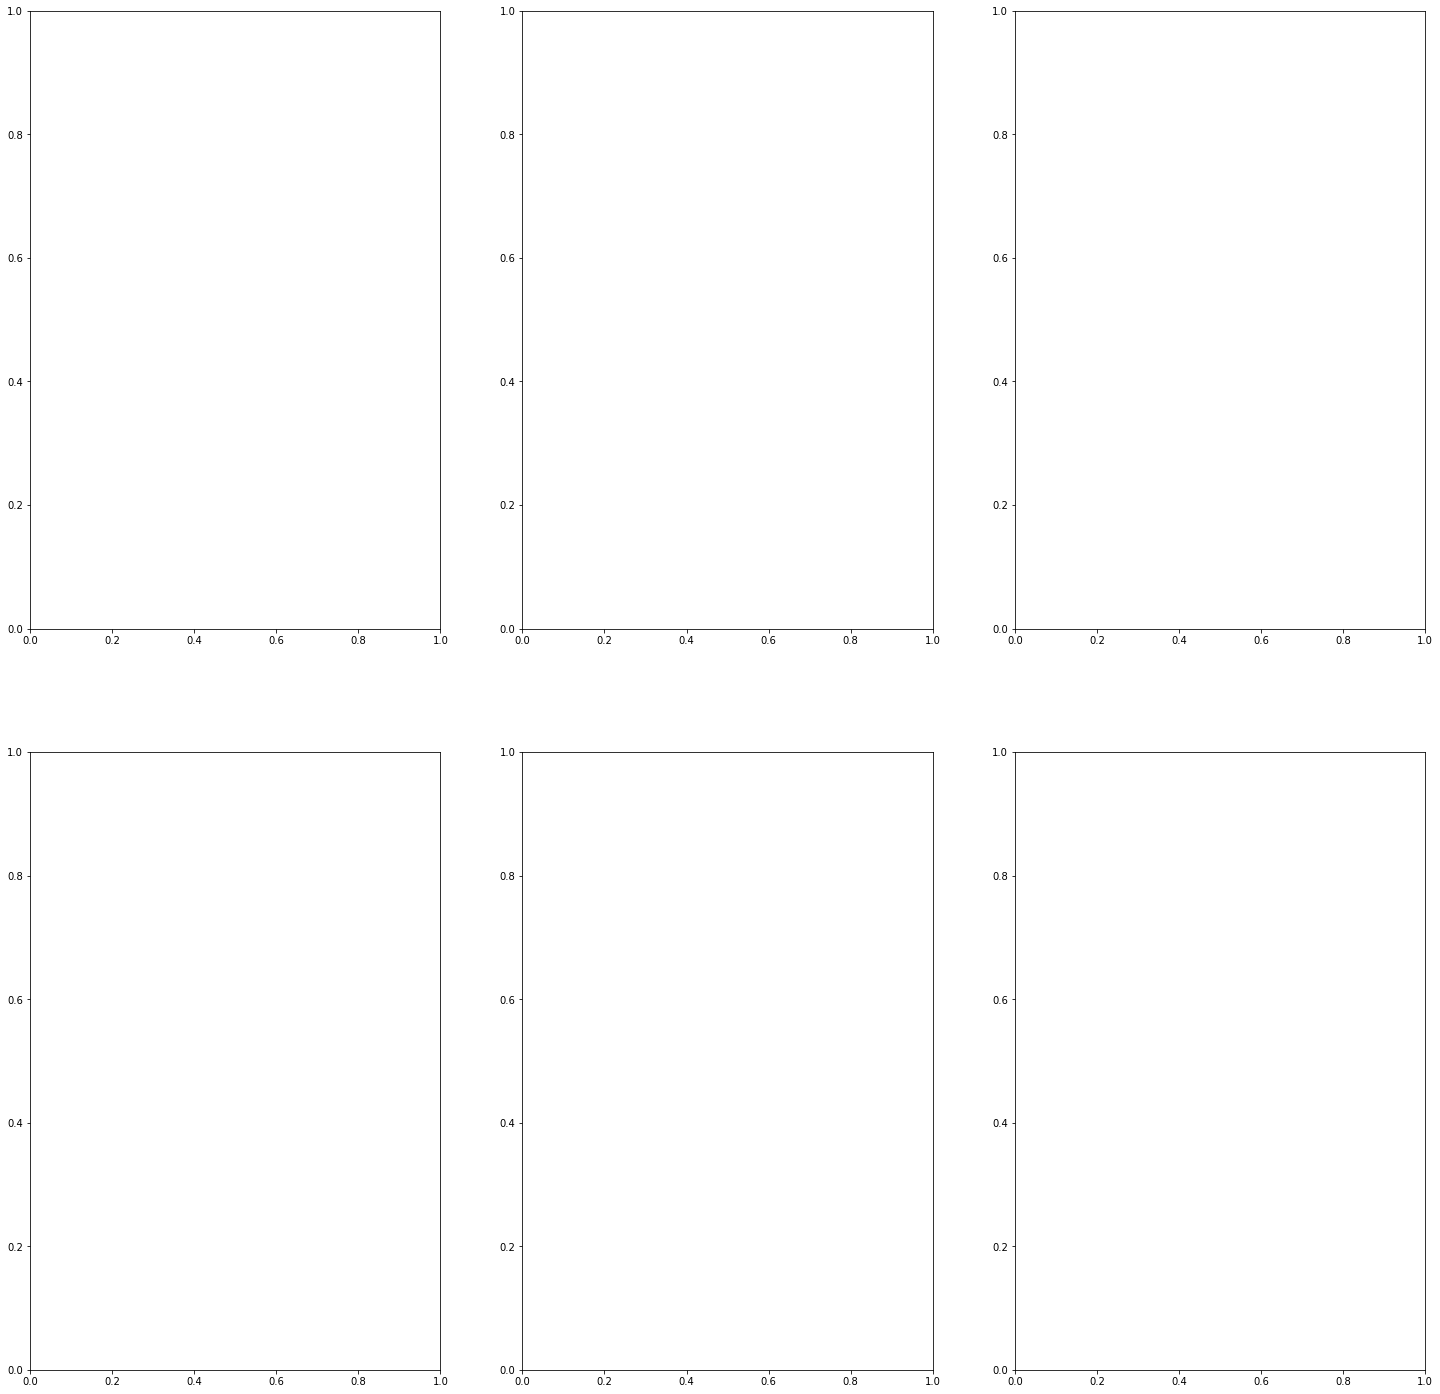

In [ ]:
axes = ('ax0', 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6')
fig, axes = plt.subplots(2,3, figsize=(25, 25))

for level, ax in zip(levels, axes):
    print(level, ax)

<ErrorbarContainer object of 3 artists>

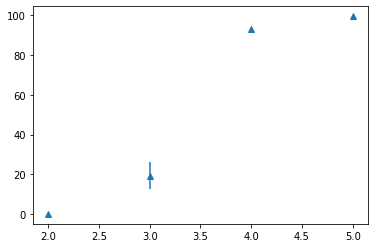

In [ ]:
x = df_results.loc['BendersOCT', level].index
y = df_results.loc[('BendersOCT', level), 'mean_gap']
e = df_results.loc[('BendersOCT', level), 'std_gap']
plt.errorbar(x, y, e, linestyle = 'None', marker = '^')

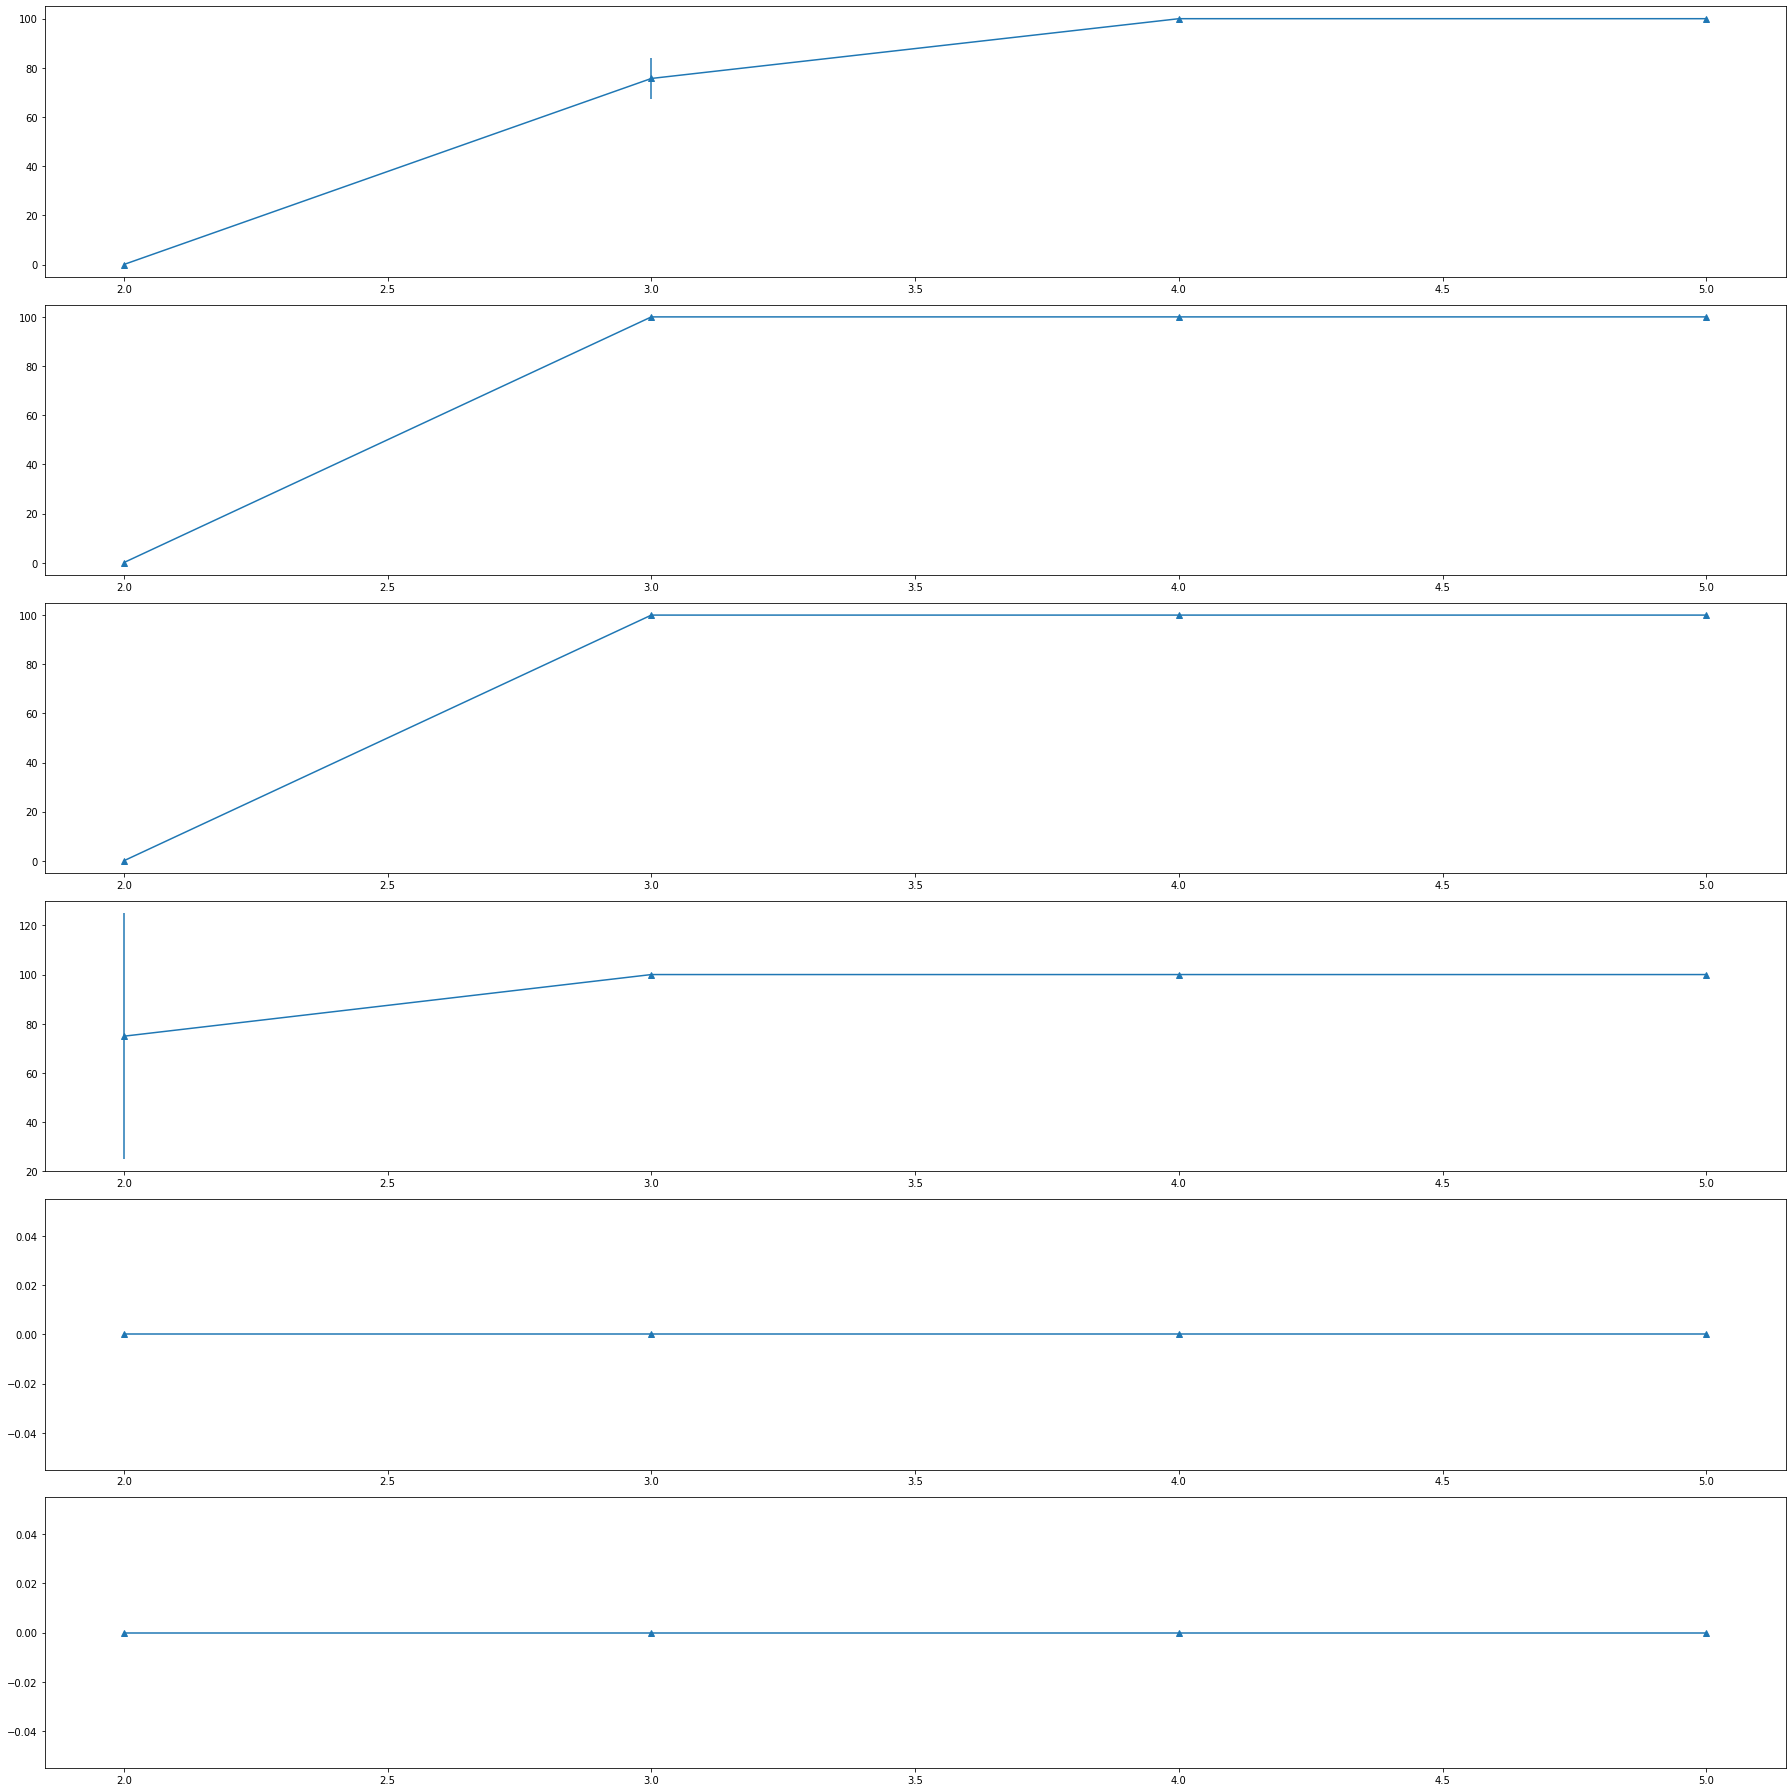

In [ ]:
levels = df_results.loc['binOCT'].index.levels[0]
axes = ('ax0', 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6')
fig, axes = plt.subplots(len(levels), figsize=(25, 25))

for level, ax in zip(levels, axes):
    x = df_results.loc['binOCT', level].index
    y = df_results.loc[('binOCT', level), 'mean_gap']
    e = df_results.loc[('binOCT', level), 'std_gap']
    ax.errorbar(x, y, e, marker = '^')
plt.tight_layout()
plt.show()